<a href="https://colab.research.google.com/github/Narbutis/ML-A-Z/blob/master/data_preprocessing_tools_HHN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

# Section 2 - Data Preprocessing

Features - Columns that are used to predict the dependent value

Dependent variables - Field that you like to predict (usually the last column of a dataset)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
print (dataset.head) # print just the first 10 rows of a dataset
print(X)

<bound method NDFrame.head of    Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes>
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [ ]:
dataset.iloc[:,3]

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object

In [ ]:
## Examples of indexing
#(https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/#:~:text=%23%20print%20dataframe.&text=To%20create%20DataFrame%20from%20dict,n%20is%20the%20array%20length.)
# Python code demonstrate creating  
# DataFrame from dict narray / lists  
# By default addresses. 
  
# intialise data of lists. 
data = {'Column_0':['00', '10', '20'], 'Column_1':['01', '11', '21'], 'Column_2':['02', '12', '22']} 
  
# Create DataFrame 
# Create DataFrame 
example = pd.DataFrame(data)
print(example)

# Using loc
print('\nloc[0] = ')
print(example.loc[0])
#example.loc['Column_1'] - won't work because doesn't specify a range of rows (but works if you ommit the coluns when selectiong rows)
print(example.loc[:,'Column_1'])

# Using iloc (line, column)
print('\niloc')
print (example.iloc[1,2])
print (example.iloc[:,2])
print (example.iloc[0:2,2])
print (example.iloc[0:3,2]) # select by range 0 to limit -1, in this case row 2
print (example.iloc[:,-1]) # same as above, because it selects the last column (reverse indexing)
print (example.iloc[:,:-1]) # all columns but last (excludes last column)

  Column_0 Column_1 Column_2
0       00       01       02
1       10       11       12
2       20       21       22

loc[0] = 
Column_0    00
Column_1    01
Column_2    02
Name: 0, dtype: object
0    01
1    11
2    21
Name: Column_1, dtype: object

iloc
12
0    02
1    12
2    22
Name: Column_2, dtype: object
0    02
1    12
Name: Column_2, dtype: object
0    02
1    12
2    22
Name: Column_2, dtype: object
0    02
1    12
2    22
Name: Column_2, dtype: object
  Column_0 Column_1
0       00       01
1       10       11
2       20       21


## Taking care of missing data

In [ ]:
from sklearn.impute import SimpleImputer #import a class
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #creation of an object in a class
print(X[:,1:3])
imputer.fit(X[:,1:3]) #uses the method ("function") that applies to our dataset, identifying the null data and calculating the mean

# This method doesn't replace an y value to the column mean yet, to do this we need to use transform:
X[:,1:3] = imputer.transform(X[:, 1:3])
print(X) # Note that we have modified the WHOLE array indirectly, by a subset of it

[[44.0 72000.0]
 [27.0 48000.0]
 [30.0 54000.0]
 [38.0 61000.0]
 [40.0 nan]
 [35.0 58000.0]
 [nan 52000.0]
 [48.0 79000.0]
 [50.0 83000.0]
 [37.0 67000.0]]
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

### Encoding the Independent Variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Transform columns with a pattern, in this one: Onehotencoder, transforming a categorical column "matrix[0]", into 
#  3 columns coded with binary values. 
# By transforming the data from string into 3 binary columns instead of a single numeric category (1, 2, 3..), we avoid
#  the misinterpretation of the field by the algorithm as quantitative field, e.g. giving greater value to category 3.
# The passtrough indicates that other columns than the Country, will be kept as original
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) # forces the output as a numpy array, to split the data after
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### Encoding the Dependent Variable

In [ ]:
# Encodes a binary category (easier), => doesn't need to be a numpy array
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [ ]:
# Splitting MUST COME BEFORE the scaling, to ensure that the test set is preserved as new data and 
#  that the model doesn't depend on it.
# e.g. suppose that the test set has some outliers, it can decalibrate the algorithm, cause overfitting etc.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# The split will create 4 sets, 2 for the training and 2 for test, where each one will have a set for
#  X, the independent variable and Y, the dependant one. Random_state defines the seed of the data sample taken.

In [ ]:
print(x_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [ ]:
print(x_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [ ]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [ ]:
print(y_test)

[0 1]


## Feature Scaling

In [ ]:
# The scaling doesn't need to be made for all machine learning models, 
#  but for some of them is a must
#  e.g. help to control the magnitude of scalar coeficients of linear 
regression
# normalization - 0 to 1, good to use in normal distributions
# standardisation - ~-3 to ~+3, broader use than normal

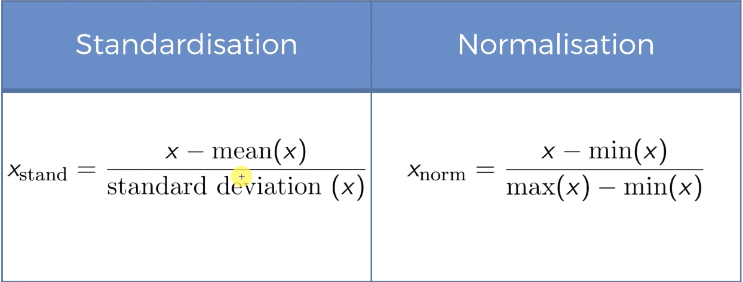

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Only apply Standardization to numeric values, not to dummy variables,
#  because 1) they already are between the range -3 to +3 and 2) the procedure
#  will change the values between lines to other values, losing the track of
#  what the dummy variable meant when was categorical.

# Fit calculates the mean and the std_dev, transform will apply the calculus
x_train[:,3:] = sc.fit_transform(x_train[:,3:])
# Only transform to the test set, because it need to work with the parameters
#  of the trained model, mean and stdev in this case
x_test[:,3:] = sc.transform(x_test[:,3:])

In [ ]:
print (x_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [ ]:
print (x_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
